# read hydrophone data in .mseed format

In [1]:
import urllib
import obspy
import os

In [2]:
# read some hydrophone data from the Oregon Shelf Cabled Benthic Experiment Package
url='https://rawdata.oceanobservatories.org/files/CE02SHBP/LJ01D/11-HYDBBA106/2017/08/19/OO-HYEA2--YDH-2017-08-19T23:55:00.000000.mseed'
file_name='sample.mseed'

if not os.path.exists(file_name):
    urllib.request.urlretrieve(url, file_name)
    
st = obspy.read(file_name)

In [3]:
print(st)

1 Trace(s) in Stream:
OO.HYEA2..YDH | 2017-08-19T23:55:00.000000Z - 2017-08-19T23:59:59.998984Z | 64000.0 Hz, 19199936 samples


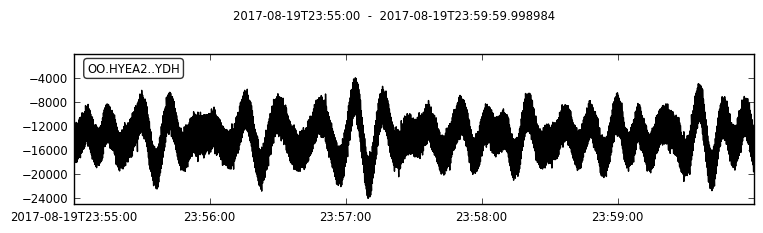

In [4]:
st.plot()

# Select 1st stream

In [5]:
tr = st[0]

In [6]:
tr.stats

         network: OO
         station: HYEA2
        location: 
         channel: YDH
       starttime: 2017-08-19T23:55:00.000000Z
         endtime: 2017-08-19T23:59:59.998984Z
   sampling_rate: 64000.0
           delta: 1.5625e-05
            npts: 19199936
           calib: 1.0
         _format: MSEED
           mseed: AttribDict({'dataquality': 'D', 'encoding': 'STEIM2', 'filesize': 33697792, 'record_length': 4096, 'byteorder': '>', 'number_of_records': 8227})

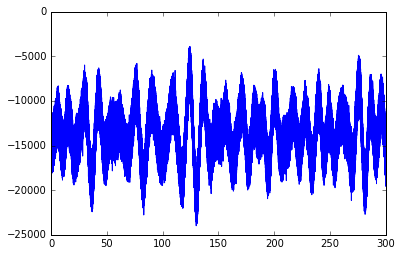

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(tr.times(), tr.data);

In [8]:
import numpy as np
start = np.datetime64(tr.stats.starttime)
print(start)

2017-08-19T23:55:00.000000


In [9]:
dt_nanosecs = 1.e9/tr.stats.sampling_rate
print(dt_nanosecs)

15625.0


In [10]:
import pandas as pd

In [11]:
jd = pd.date_range(start, 
              periods=tr.stats.npts, 
              freq='{}ns'.format(dt_nanosecs))

In [12]:
df = pd.DataFrame(tr.data, index=jd, columns=['stream1'])

In [13]:
df.head(3)

,stream1
2017-08-19 23:55:00.000000000,-15004
2017-08-19 23:55:00.000015625,-14783
2017-08-19 23:55:00.000031250,-14817


In [14]:
df.tail(3)

,stream1
2017-08-19 23:59:59.998953125,-14603
2017-08-19 23:59:59.998968750,-15246
2017-08-19 23:59:59.998984375,-14873


In [15]:
df.describe()

,stream1
count,1.919994e+07
mean,-1.368198e+04
std,2.559722e+03
min,-2.398500e+04
25%,-1.547500e+04
50%,-1.367300e+04
75%,-1.186900e+04
max,-3.901000e+03


## Try writing data as netcdf file

In [ ]:
import xarray as xr
nc = xr.Dataset.from_dataframe(df)

In [28]:
nc.to_netcdf('foo.nc', format='netcdf4', 
             encoding={'stream1':{'complevel':4, 'chunksizes':{'index':10}}})

KeyError: 0